In [1]:

from timeit import timeit, default_timer
from random import randint, choice
from string import ascii_lowercase
from matplotlib import pyplot as plt

NUMBER = 1000 # timeit iterations
LIST_LEN = 10000 # lenght of generated list
SETUP = '''from __main__ import for_loop, filter_function, list_comprehension, list_comprehension_reverse''' # Setup for timeit

### Create and populate list with integers and strings

In [2]:
def populate_list(n):
    '''Takes number as parameter
    Returns populated list with random integers and strings at random pace''' 
    my_list = []
    letters = ascii_lowercase
    for i in range(n):
        number = randint(1,27)
        if i%number == 0:
            my_list.append(number)
        else:
            my_list.append(choice(letters))
    return my_list

my_list = populate_list(LIST_LEN)

### For loop function

In [3]:
def for_loop(my_list):
    '''Takes list as parameter with strings and integers
    Returns list with only strings using simple for loop'''
    for i in my_list[::-1]:
        if type(i) == int:
            my_list.remove(i)
    return my_list

    

### Filter function
    

In [4]:
def filter_function(my_list):
    '''Takes list as parameter with strings and integers
    Returns list with only strings using filter and lambda'''
    return list(filter(lambda x: isinstance(x, str), my_list))
    

### List comprehension with [::-1] function

In [5]:
def list_comprehension(my_list):
    '''Takes list as parameter with strings and integers
    Returns list with only strings using list comprehension'''
    return [x for x in my_list[::-1] if type(x) is str][::-1]

### List comprehension with reverse function

In [6]:

def list_comprehension_reverse(my_list):
    '''Takes list as parameter with strings and integers
    Returns list with only strings using list comprehension with reverse method'''
    my_list = [x for x in my_list[::-1] if type(x) is str]
    my_list.reverse()
    return my_list

### Ploting function

In [7]:
def plotting(for_loop_time, filter_time, \
             list_comprehension_time, list_comprehension_reverse_time, list_lenght):

    plt.plot(list_lenght, for_loop_time, label = "For Loop")
    plt.plot(list_lenght, filter_time, label = "Filter Time")
    plt.plot(list_lenght,list_comprehension_time, label = "List Compr")
    plt.plot(list_lenght,list_comprehension_reverse_time, label = "List Compr Rev")
    plt.title('Time comparison')
    plt.ylabel('Time in seconds')
    plt.xlabel('List length')
    plt.legend()
    plt.show()



### For loop time for removing integers from a list



In [8]:
def all_function_time(list_input):
    
    for_loop_time = timeit(f"{for_loop(my_list)}",\
         setup = SETUP,\
         number = NUMBER)
    
    filter_time = timeit(f"{filter_function(my_list)}",\
        setup= SETUP,\
        number = NUMBER)
    
    list_comprehension_time = timeit(f"{list_comprehension(my_list)}",\
        setup = SETUP,\
        number = NUMBER)
    
    list_comprehension_reverse_time = timeit(f"{list_comprehension_reverse(my_list)}",\
       setup = SETUP, \
       number = NUMBER)
    
    return for_loop_time, filter_time, list_comprehension_time, list_comprehension_reverse_time
    

In [9]:

for_loop_time, filter_time, list_comprehension_time, \
list_comprehension_reverse_time = all_function_time(my_list)

print(f"Time for_loop: {for_loop_time}\n"
f"Time filter_function: {filter_time}\n"
f"Time list_comprehension: {list_comprehension_time}\n"
f"Time list_comprehension_reverse: {list_comprehension_reverse_time}\n")

Time for_loop: 0.018235199999999896
Time filter_function: 0.017916399999999832
Time list_comprehension: 0.01861399999999991
Time list_comprehension_reverse: 0.018864800000000237



### Plots

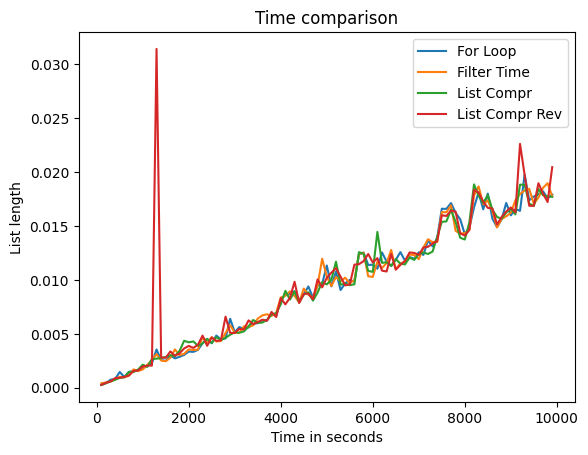

In [10]:

for_loop_time_list = []
filter_time_list = []
list_comprehension_time_list = []
list_comprehension_reverse_time_list = []
r = range(100, 10000, 100)

for i in r:
    
    my_list = populate_list(i)
    for_loop_time, filter_time, list_comprehension_time, \
        list_comprehension_reverse_time = all_function_time(my_list)
    
    for_loop_time_list.append(for_loop_time)
    filter_time_list.append(filter_time)
    list_comprehension_time_list.append(list_comprehension_time)
    list_comprehension_reverse_time_list.append(list_comprehension_reverse_time)
    
plotting(for_loop_time_list, filter_time_list, list_comprehension_time_list,\
         list_comprehension_reverse_time_list, r)